# HW1: LeNet-5 with Post-training Quantization
[LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) is considered to be the first ConvNet.
We are going to implement a neural architecture similar to LeNet and train it with [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset.

Before we start, you may check this [Tensorspace-LeNet](https://tensorspace.org/html/playground/lenet.html) to play with LeNet and get familiar with this neural architecture.

![image](https://production-media.paperswithcode.com/methods/LeNet_Original_Image_48T74Lc.jpg)
Ref.: LeCun et al., Gradient-Based Learning Applied to Document Recognition, 1998a

<font color='red'>Name: 廖昱承 Student ID: 107062212 </font>

## 1. Initial Setup

We are going to implement and train this neural network with PyTorch. 
If you are not familiar with PyTorch, check the [official tutorail](https://pytorch.org/tutorials/beginner/basics/intro.html)

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### 1.1 Loading dataset
Load training and test data from the MNIST dataset.

In [3]:
transform = transforms.Compose(
    [
     transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))
    ])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                         shuffle=False, num_workers=2)

### 1.2 Defining the Neural Network 
Define a simple CNN that classifies MNIST images.

In [4]:
from nnutils import LeNet
net = LeNet().to(device)

### 1.3 Question: Profiling the Neural Architecture by TorchInfo
Torchinfo provides information complementary to what is provided by print(your_model) in PyTorch, similar to Tensorflow's `model.summary()` API to view the visualization of the model, which is helpful while debugging your network. Check this [link](https://github.com/TylerYep/torchinfo#how-to-use) about how to use TorchInfo by `summary()` and fill in the TODO in the following cell. You should get the result similar to the table below:

```
==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
==========================================================================================
LeNet                                    --                        --
...
...
==========================================================================================
Total params: ...
...
Estimated Total Size (MB): ...
==========================================================================================
```

Ref.: https://github.com/TylerYep/torchinfo

Please read *B. LeNet-5* in the [original paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) and answer the following questions in the report.
1. What is the type (convolution, pooling, fully-connected layer, etc.), input activation size, output activation size, and activation function (if any) of each layer?
2. What is the difference between this neural architecture and the LeNet-5 in the [original paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)?
3. Could we replace the 3rd conv, the conv in c5, with a fully connected layer?

### 1.3 Answers
<font color='red'>Write your answers here.</font>
1.  LeNet                      [batch_size, input_channel, input_size, output_channel]\
├─Sequential: 1-1                        [1, 6, 28, 28]            --\
│    └─Conv2d: 2-1                       [1, 6, 28, 28]            150\
│    └─ReLU: 2-2                         [1, 6, 28, 28]            --\
├─Sequential: 1-2                        [1, 6, 14, 14]            --\
│    └─MaxPool2d: 2-3                    [1, 6, 14, 14]            --\
├─Sequential: 1-3                        [1, 16, 10, 10]           --\
│    └─Conv2d: 2-4                       [1, 16, 10, 10]           2,400\
│    └─ReLU: 2-5                         [1, 16, 10, 10]           --\
├─Sequential: 1-4                        [1, 16, 5, 5]             --\
│    └─MaxPool2d: 2-6                    [1, 16, 5, 5]             --\
├─Sequential: 1-5                        [1, 120, 1, 1]            --\
│    └─Conv2d: 2-7                       [1, 120, 1, 1]            48,000\
│    └─ReLU: 2-8                         [1, 120, 1, 1]            --\
├─Sequential: 1-6                        [1, 84]                   --\
│    └─Linear: 2-9                       [1, 84]                   10,080\
│    └─ReLU: 2-10                        [1, 84]                   --\
├─Sequential: 1-7                        [1, 10]                   --\
│    └─Linear: 2-11                      [1, 10]                   840
2. In comparison to Lenet-5, it uses max pooling instead of average pooling.
3. No, since if everything is changed but input size, the dimension of feature map will exceed 1*1.

In [5]:
!pip install torchinfo
from torchinfo import summary
summary(net, input_size=(1, 1, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
LeNet                                    --                        --
├─Sequential: 1-1                        [1, 6, 28, 28]            --
│    └─Conv2d: 2-1                       [1, 6, 28, 28]            150
│    └─ReLU: 2-2                         [1, 6, 28, 28]            --
├─Sequential: 1-2                        [1, 6, 14, 14]            --
│    └─MaxPool2d: 2-3                    [1, 6, 14, 14]            --
├─Sequential: 1-3                        [1, 16, 10, 10]           --
│    └─Conv2d: 2-4                       [1, 16, 10, 10]           2,400
│    └─ReLU: 2-5                         [1, 16, 10, 10]           --
├─Sequential: 1-4                        [1, 16, 5, 5]             --
│    └─MaxPool2d: 2-6                    [1, 16, 5, 5]             --
├─Sequential: 1-5                        [1, 120, 1, 1]            --
│    └─Conv2d: 2-7                       [1, 120, 1, 1]            48,000
│    └─

### 1.4 Training and Testing the Neural Network
Train this CNN on the training dataset (this may take a few moments).
* Check how to save and load the model
    * https://pytorch.org/tutorials/beginner/saving_loading_models.html
    * Save:
        ```
        torch.save(model.state_dict(), PATH)
        ```
    * Load:
        ```
        model = TheModelClass(*args, **kwargs)
        model.load_state_dict(torch.load(PATH))
        model.eval()
        ```
* After training the model, we will save it as `lenet.pt`.
* You should comment out `train(net, trainloader, device)` and uncomment `net.load_state_dict(torch.load('lenet.pt'))` before submitting your homework.
    * Also, reloading the model from `lenet.pt` can save your time if there is something wrong and you need to restart and run all.

If you get `ModuleNotFoundError: No module named 'nnutils'` when running the following cell, you should check if the `nnutils` folder exists. `nnutils` and `homework1.ipynb` should be placed in the same directory.

In [6]:
from nnutils import train, test

train(net, trainloader, device)
# net.load_state_dict(torch.load('lenet.pt'))
score = test(net, testloader, None, device)

print('Accuracy of the network on the test images: {}%'.format(score))
torch.save(net.state_dict(), 'lenet.pt')

[1,  2000] loss: 0.358
[1,  4000] loss: 0.148
[1,  6000] loss: 0.113
[1,  8000] loss: 0.109
[1, 10000] loss: 0.087
[1, 12000] loss: 0.093
[1, 14000] loss: 0.079
[2,  2000] loss: 0.064
[2,  4000] loss: 0.074
[2,  6000] loss: 0.055
[2,  8000] loss: 0.064
[2, 10000] loss: 0.065
[2, 12000] loss: 0.069
[2, 14000] loss: 0.054
Finished Training
Accuracy of the network on the test images: 98.73%


## 2. Post-training Quantization
### 2.1 Question: Visualizing Weights

We have flattened all vectors for you by `tensor.view(-1)`.

Plot a histogram of each weight and show the total range and 3-sigma range for each weight. Fill in the TODO in the following cell.

hint: `np.histogram()` and `plt.hist()`

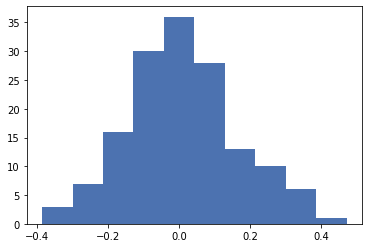

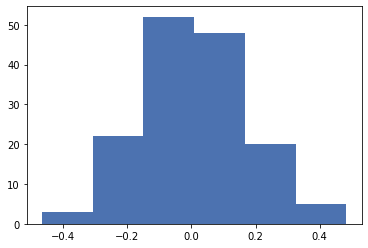

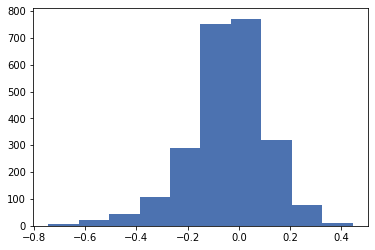

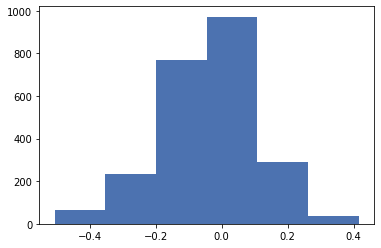

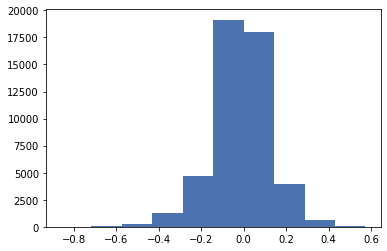

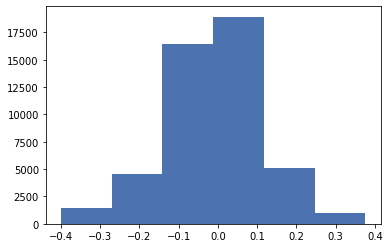

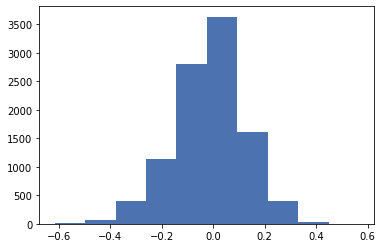

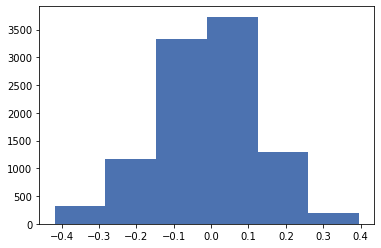

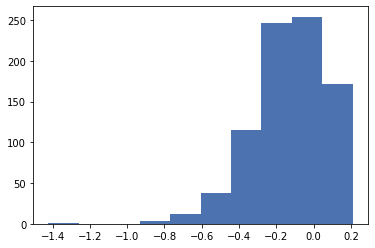

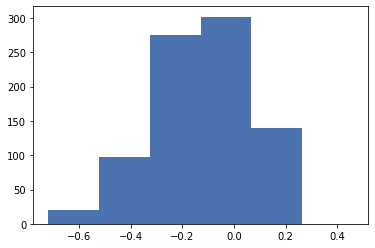

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
conv1_weights = net.c1[0].weight.data.cpu().view(-1)
conv2_weights = net.c3[0].weight.data.cpu().view(-1)
conv3_weights = net.c5[0].weight.data.cpu().view(-1)
fc1_weights = net.f6[0].weight.data.cpu().view(-1)
fc2_weights = net.output[0].weight.data.cpu().view(-1)
def show_image(weights):
    data_m = pd.Series(weights)
    data_m = data_m.value_counts()
    data_m = data_m.sort_index()
    data_m = pd.Series(data_m.index.values, index = data_m)
    r_data_m = pd.DataFrame(data_m)
    plt.hist(r_data_m[0])
    plt.show()
    std = weights.std()
    bins = list(weights.mean() + i * weights.std() for i in range(-3, 4))
    plt.hist(r_data_m[0], bins = bins)
    plt.show()
    return 
show_image(conv1_weights)
show_image(conv2_weights)
show_image(conv3_weights)
show_image(fc1_weights)
show_image(fc2_weights)

### 2.2 Question:  Quantizing Weights
Computation of convolution or fully-connected layer can be expressed as
$$W\times I = O$$
where $W$ is the weight tensor, $I$ is the input tensor, and $O$ is the output tensor.
Let $n_w$ be the scaling factor. We have $$W_q\times I =n_w W \times I\approx n_w O$$ where $W_q$ is the quantized 8-bit signed integer weight tensor.

Fill in the TODO in `quantized_weights()` of `quantize_layer_weights()`.If you’ve done everything correctly, the accuracy degradation should be negligible.
1. What is $n_w$? Explain how you get it.
2. What is the accuracy degradation? \
Show both relative error and absolute error when the true value is the accuracy we get before performing any quantization.

### 2.3 Answers
<font color='red'>Write your answers here.</font>
1. ...
2. ...

In [ ]:
score = test(net, testloader, None, device)
print('Accuracy of the network on the test images: {}%'.format(score))

In [ ]:
from nnutils import copy_model, quantize_layer_weights
net_q2 = copy_model(net)
quantize_layer_weights(net_q2, device)
score = test(net_q2, testloader, None, device)
print('Accuracy of the network after quantizing all weights: {}%'.format(score))

### 2.3 Question: Visualizing Activations
Plot histograms of the input images and the output activations of each operation and answer the following questions in the report. Fill in the TODO in the following cell.
1. Discuss any observations about the distribution of these activations.
2. Record the range of the values, as well as their 3-sigma range (the difference between μ + 3σ and μ − 3σ).

### 2.3 Answers
<font color='red'>Write your answers here.</font>
1. ...
2. ...

In [ ]:
net_q3 = copy_model(net)

def visualizeActivations(module, input, output):
    if module.profile_activations == True:
        module.inAct = input[0].cpu().view(-1)
        module.outAct = output[0].cpu().view(-1)
    
for name, model in net_q3.named_children():
    model.profile_activations = True
    model.register_forward_hook(visualizeActivations)
net_q3.eval()
with torch.no_grad():
    input = trainset[0][0].unsqueeze(0)
    _ = net_q3(input.to(device))  
for name, model in net_q3.named_children(): model.profile_activations = False 

In [ ]:
input_activations = net_q3.c1.inAct
c1_output_activations = net_q3.c1.outAct
c3_output_activations = net_q3.c3.outAct
c5_output_activations = net_q3.c5.outAct
f6_output_activations = net_q3.f6.outAct
output_output_activations = net_q3.output.outAct

# TODO

### 2.4 Question:  Quantizing Activations
The output of conv in `c1` can be $$W_{conv1}* I=O_{conv1}.$$
Let the scaling factor of the quantized input matrix $I$ be $n_I$, the scaling factor of the quantized weight matrix $W_{conv1}$ 
be $n_{W_{c1}}$, and the scaling factor of the output matrix $O_{conv1}$ be $n_{O_{c1}}$.  
$$W_{conv1_q}* I_q = (n_{W_{c1}}W_{conv1})* (n_II)\approx (n_{W_{c1}}n_I)O_{conv1}$$
where $W_{conv1_q}$ is the quantized 8-bit signed integer weight tensor and $I_q$ is the quantized 8-bit signed integer input activation tensor.

On the other hand,
$$O_{conv1_q} \approx n_{O_{c1}}O_{conv1}$$
where $O_{conv1_q}$ is the quantized 8-bit signed integer output activation tensor "without" considering quantized weight tensor and quantized input activation tensor.

Since we're doing post-training quantization, we can get $n_I$, $n_{W_{c1}}$, and $n_{O_{c1}}$ first and do the other calculations for quantization.

Answer the following questions in the report.

1. How to compute $n_I$, $n_{W_{c1}}$, and $n_{O_{c1}}$? 
2. The ture quantized output activation tensor is depend on $W_{conv1_q}$ and $I_q$, so we cannot simply apply $n_{O_{c1}}$ on the output of $W_{conv1_q}* I_q$ to quantize the output activation. Derive an equation for the quantized output of the conv in c1 after quantizing activation and weight with  $n_I$, $n_{W_{c1}}$, and $n_{O_{c1}}$ and show the scaling factor $S_1$ of it. \
(hint: quantize $O$ in $W_{conv1_q}* I_q = O$ and get $W_{conv1_q}* I_q \approx S_1O = O_q$ where $O_q$ is the quantized 8-bit signed integer output.)
3. Derive an equation for the quantized output of the conv in `c3` after quantizing activation and weight.
4. Show the general form of the equation for layer $l$ to calculate the scaling factor $S_l$ of output activation.
    * You may use notations like $W_l, O_l$ to indicate the weight and output activation of layer $l$, respectively.
    * Fill in the TODO in `quantize_initial_input()` and `quantize_activations()` of `NetQuantized()` to compute $n_I$ and $S_l$ for layer $l$ that scale values to 8-bit signed integer.
5. As for `forward()` of `NetQuantized()`, make sure you use fixed-point representation when doing any calculation with input/output scale. Keep in mind that we will implement a hardware accelerator with this model, so it is better not to do any floating-point computation.
    * You will have to fill in the TODO in `forward()` to scale the initial input and scale the outputs of each layer. Please follow these steps whenever processing with input/output scale: 
        1. `scale = round(scale*(2**16))`: Now we get a fixed-point number, and we will save this value to scale_hw.json later
        2. `(scale*features) >> 16`: `>>` means right bit shift operator 
        3. Clamp the value between -128 and 127
    
    * If you have done everything correctly, the accuracy degradation should be negligible. 
    * What is the accuracy degradation? Show both relative error and absolute error when the true value is the accuracy we get before performing any quantization.
6. What are the pros and cons of using fixed-point representation when forwarding feature maps to the next layer?
7. Show the input/output scale before and after `round(scale*(2**16))`?

### 2.4 Answers
<font color='red'>Write your answers here.</font>
1. ...
2. ...
3. ...
4. ...
5. ...
6. ...
7. ...

In [ ]:
from nnutils import NetQuantized
from copy import deepcopy

net_init = copy_model(net_q2)
net_init.input_activations = deepcopy(net_q3.c1.inAct)
        
for layer_init, layer_q3 in zip(net_init.children(), net_q3.children()):
    layer_init.inAct = deepcopy(layer_q3.inAct)
    layer_init.outAct = deepcopy(layer_q3.outAct)

net_quantized = NetQuantized(net_init)

In [ ]:
score = test(net_quantized, testloader, max_samples=None, device=device)
print('Accuracy of the network after quantizing both weights and activations: {}%'.format(score))

### 2.5 Question:  Quantizing Biases
We add a bias in the final layer of this LeNet.

Answer the following questions in the report.
1. Now, the equation is $$W*I+\beta = O,$$ where $\beta$ is the bias. Derive the equation of a quantized layer with bias.\
Note that our biases are commonly quantized to 32-bits. Therefore, your bias values are not necessary between -128 and 127.
2. What is the scaling factor for the bias?\
(hint: the form looks just like what we have done for quantizing activations)
3. Fill in the TODO in `NetQuantizedWithBias()`.If you have done everything correctly, the accuracy degradation should be negligible. What is the accuracy degradation?
    * Show both relative error and absolute error when the true value is the accuracy we get before performing any quantization.

### 2.5 Answers
<font color='red'>Write your answers here.</font>
1. ...
2. ...
3. ...

* After training the model, we will save it as `lenet_with_bias.pt`.
* You should comment out `train(net_with_bias, trainloader, device)` and uncomment `net_with_bias.load_state_dict(torch.load('lenet_with_bias.pt'))` before submitting your homework.
    * Note that reloading the model from `lenet_with_bias.pt` can save your time. You don't need train the model from scratch every time.

In [ ]:
from nnutils import LeNet_with_bias

net_with_bias = LeNet_with_bias().to(device)
train(net_with_bias, trainloader, device)
# net_with_bias.load_state_dict(torch.load('lenet_with_bias.pt'))
score = test(net_with_bias, testloader, max_samples=None, device=device)

print('Accuracy of the network (with a bias) on the test images: {}%'.format(score))
torch.save(net_with_bias.state_dict(), 'lenet_with_bias.pt')

In [ ]:
for name, model in net_with_bias.named_children():
    model.profile_activations = True
    model.register_forward_hook(visualizeActivations)
net_with_bias.eval()
with torch.no_grad():
    input = trainset[0][0].unsqueeze(0)
    _ = net_with_bias(input.to(device))
for name, model in net_with_bias.named_children(): model.profile_activations = False 

In [ ]:
net_with_bias_with_quantized_weights = copy_model(net_with_bias)
quantize_layer_weights(net_with_bias_with_quantized_weights, device)

score = test(net_with_bias_with_quantized_weights, testloader, max_samples=None, device=device)
print('Accuracy of the network on the test images after all the weights are quantized but the bias isn\'t: {}%'.format(score))

In [ ]:
from nnutils import NetQuantizedWithBias
net_quantized_with_bias = NetQuantizedWithBias(net_with_bias_with_quantized_weights)
score = test(net_quantized_with_bias, testloader, max_samples=None, device=device)
print('Accuracy of the network on the test images after all the weights and the bias are quantized: {}%'.format(score))

# Extract the inputs and outputs of the quantized model.

In [ ]:
# Replace and save the model with quantized biases.
inference_model = copy_model(net_quantized_with_bias)
torch.save(inference_model.state_dict(), 'net_quantized_with_bias.pt')

In [ ]:
# Use the accuray to check if it remains the same.
score = test(inference_model, testloader, max_samples=None, device = device)
print('Accuracy of the network after quantizing both weights and activations: {}%'.format(score))

Choose 100 images to generate patterns for our homework 2.

In [ ]:
index = range(100)

Save the input/output activations to the CSV format.

In [ ]:
import os 
import zipfile
# It is easier to download all the files zipped.
zf = zipfile.ZipFile('parameters.zip', 'w', zipfile.ZIP_DEFLATED)

if not os.path.exists('./activations'):
    os.mkdir('./activations')

In [ ]:
for ind in range(100):
    if not os.path.exists('./activations/img{}'.format(ind)):
        os.mkdir('./activations/img{}'.format(ind))

    for name, model in inference_model.named_children():
        model.profile_activations = True
        model.register_forward_hook(visualizeActivations)
    input, label = testset[index[ind]]
    output = inference_model(input.unsqueeze(0).to(device))
    for name, model in inference_model.named_children(): model.profile_activations = False 
    
    np.savetxt('./activations/img{}/input.csv'.format(ind), input.cpu().data.numpy().reshape(-1), delimiter=',')
    np.savetxt('./activations/img{}/output.csv'.format(ind), output.cpu().data.numpy().reshape(-1).astype(int), delimiter=',')
    zf.write('./activations/img{}/input.csv'.format(ind))
    zf.write('./activations/img{}/output.csv'.format(ind))
    
    opDict = {
        'c1': (inference_model.c1.inAct, inference_model.c1.outAct),
        's2': (inference_model.s2.inAct, inference_model.s2.outAct),
        'c3': (inference_model.c3.inAct, inference_model.c3.outAct),
        's4': (inference_model.s4.inAct, inference_model.s4.outAct),
        'c5': (inference_model.c5.inAct, inference_model.c5.outAct),
        'f6': (inference_model.f6.inAct, inference_model.f6.outAct),
        'output': (inference_model.output.inAct, inference_model.output.outAct)
    }
    
    for key in opDict:
        if not os.path.exists('./activations/img{}/{}'.format(ind, key)):
            os.mkdir('./activations/img{}/{}'.format(ind, key))
        np.savetxt('./activations/img{}/{}/input.csv'.format(ind, key), opDict[key][0].cpu().data.numpy().reshape(-1).astype(int), delimiter=',')
        np.savetxt('./activations/img{}/{}/output.csv'.format(ind, key), opDict[key][1].cpu().data.numpy().reshape(-1).astype(int), delimiter=',')
        zf.write('./activations/img{}/{}/input.csv'.format(ind, key))
        zf.write('./activations/img{}/{}/output.csv'.format(ind, key))

Save the weights of each layer to the CSV format.

In [ ]:
if not os.path.exists('./weights'):
    os.mkdir('./weights')
    
for name, weights in inference_model.state_dict().items():
    print(name, 'with shape:' , weights.shape)
    np.savetxt('./weights/%s.csv' %(name) , weights.cpu().numpy().reshape(-1).astype(int), delimiter=',')
    zf.write('./weights/%s.csv' %(name))

Record the scaling factors to JSON file.

In [ ]:
import json
scales = {'input_scale':inference_model.input_scale.item(), 'c1_output_scale': inference_model.c1.output_scale.item(), 'c3_output_scale':inference_model.c3.output_scale.item(),
        'c5_output_scale' :inference_model.c5.output_scale.item(), 'f6_output_scale':inference_model.f6.output_scale.item(), 'output_output_scale':inference_model.output.output_scale.item()}
print(scales)
with open('scale.json', 'w', newline='') as jsonfile:
    json.dump(scales, jsonfile)

zf.write('./scale.json')

In [ ]:
import json
scale_hw = {
    'input_scale': int(round(inference_model.input_scale.item())), 
    'c1_output_scale': int(round(inference_model.c1.output_scale.item()*(2**16))), 
    'c3_output_scale': int(round(inference_model.c3.output_scale.item()*(2**16))),
    'c5_output_scale' : int(round(inference_model.c5.output_scale.item()*(2**16))), 
    'f6_output_scale': int(round(inference_model.f6.output_scale.item()*(2**16))), 
    'output_output_scale': int(round(inference_model.output.output_scale.item()*(2**16)))
}
print(scale_hw)
with open('scale_hw.json', 'w', newline='') as jsonfile:
    json.dump(scale_hw, jsonfile)

zf.write('./scale_hw.json')

Save the zip file.

In [ ]:
zf.close()